In [1564]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')


# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [1565]:
export= pd.read_csv('Export.csv')
trade= pd.read_excel('Trade.xlsx')

In [1566]:
export.head()

,Country Name,Country Code,2006,2007,2008,2009,2010
0,Aruba,ABW,1.595335e+09,1.742107e+09,1.863014e+09,1.606810e+09,1.477512e+09
1,Africa Eastern and Southern,AFE,1.720000e+11,2.130000e+11,2.540000e+11,1.970000e+11,2.520000e+11
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,1.250000e+11,1.230000e+11,1.700000e+11,1.230000e+11,1.760000e+11
4,Angola,AGO,3.324512e+10,4.431967e+10,6.416842e+10,4.131061e+10,5.028043e+10


In [1567]:
trade.head()

,year,ccode,cname,ph_infrastructure,ict,business,border_transp
0,2007,ALB,Albania,0.199268,0.202198,0.224723,0.639566
1,2007,DZA,Algeria,0.343228,0.274871,0.355446,0.627198
2,2007,ARG,Argentina,0.295575,0.407860,0.141944,0.678222
3,2007,ARM,Armenia,0.246160,0.291690,0.213323,0.598222
4,2007,AUS,Australia,0.754772,0.814906,0.856358,0.809220


In [1568]:
# Assuming you have two DataFrames 'trade' and 'export'
# First, merge the DataFrames based on the 'ccode' and 'Country Code' columns
merged_df = trade.merge(export[['Country Code', '2007']], left_on='ccode', right_on='Country Code', how='left')

# Now, assign the "export" column from the merged DataFrame to the "trade" DataFrame
trade['export'] = merged_df['2007']

In [1569]:
trade.head()


,year,ccode,cname,ph_infrastructure,ict,business,border_transp,export
0,2007,ALB,Albania,0.199268,0.202198,0.224723,0.639566,3.016116e+09
1,2007,DZA,Algeria,0.343228,0.274871,0.355446,0.627198,6.353124e+10
2,2007,ARG,Argentina,0.295575,0.407860,0.141944,0.678222,6.516232e+10
3,2007,ARM,Armenia,0.246160,0.291690,0.213323,0.598222,1.674567e+09
4,2007,AUS,Australia,0.754772,0.814906,0.856358,0.809220,1.730000e+11


In [1570]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

trade["export"]=scaler.fit_transform(trade[["export"]])

In [1571]:
trade.head()

,year,ccode,cname,ph_infrastructure,ict,business,border_transp,export
0,2007,ALB,Albania,0.199268,0.202198,0.224723,0.639566,0.001678
1,2007,DZA,Algeria,0.343228,0.274871,0.355446,0.627198,0.038138
2,2007,ARG,Argentina,0.295575,0.407860,0.141944,0.678222,0.039121
3,2007,ARM,Armenia,0.246160,0.291690,0.213323,0.598222,0.000870
4,2007,AUS,Australia,0.754772,0.814906,0.856358,0.809220,0.104092


In [1572]:
trade.drop(["year","ccode","cname"],inplace=True,axis=1)

In [1573]:
new_column_names = ['Physical_infrastructure','ICT','Business','Border_Transportation','Export']
trade.columns=new_column_names

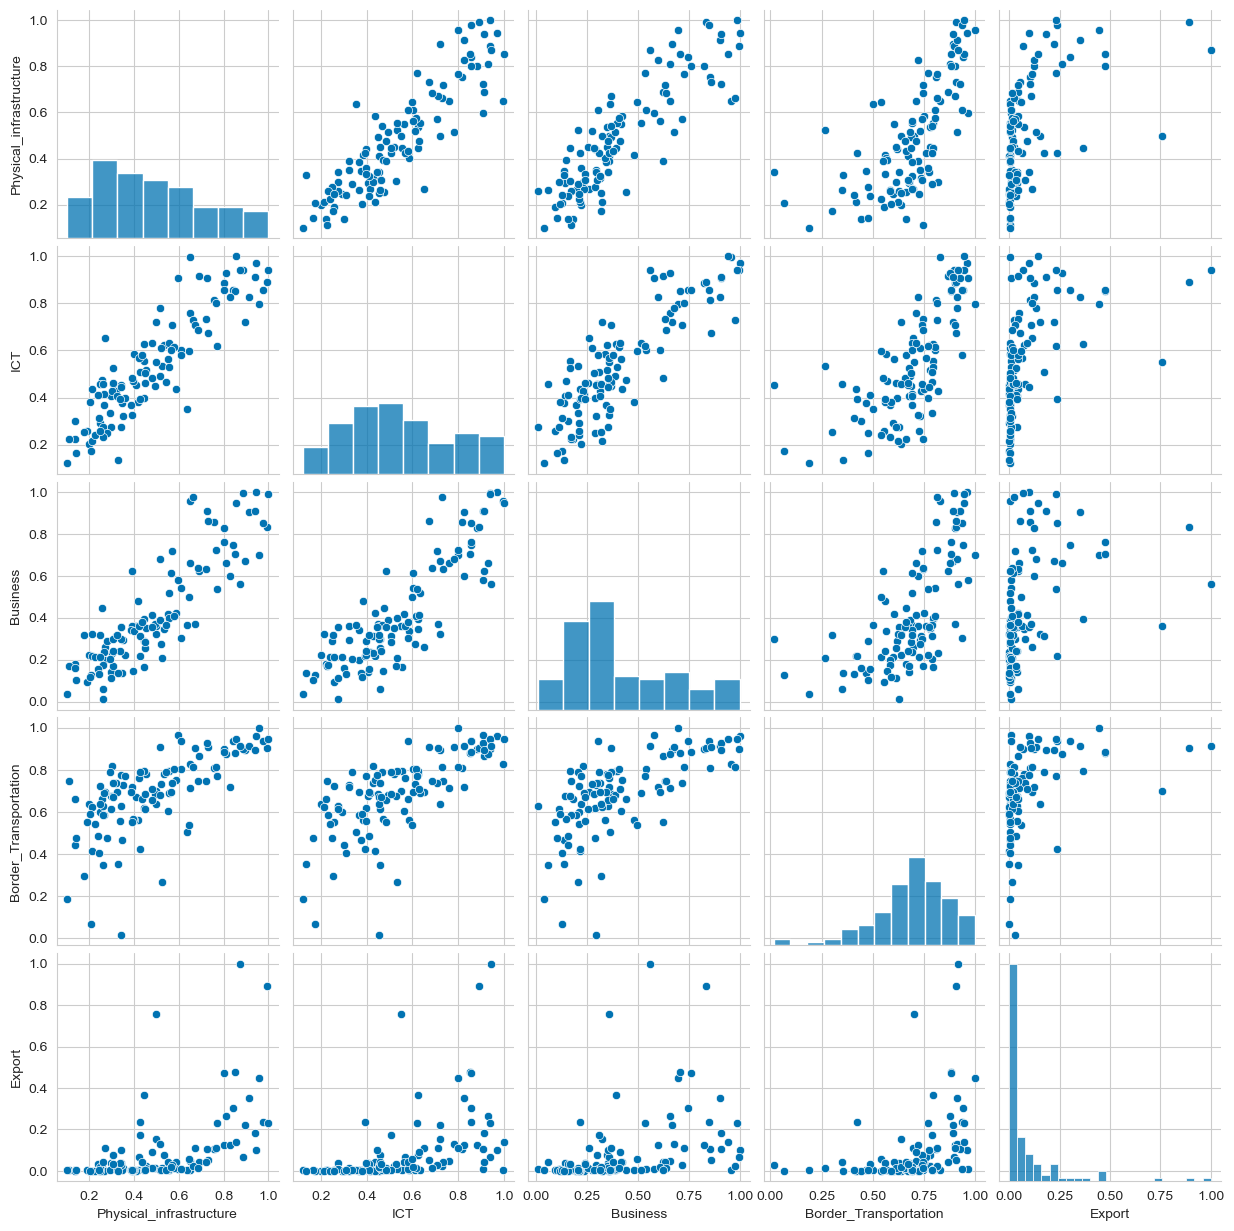

In [1574]:
sns.set_palette("colorblind")
sns.set_style("whitegrid")

sns.pairplot(trade)

In [1575]:
# Drop rows where 'export' column is equal to 0
trade.drop(trade[trade["Export"] == 0].index, inplace=True)

In [1576]:
trade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 111
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Physical_infrastructure  111 non-null    float64
 1   ICT                      111 non-null    float64
 2   Business                 111 non-null    float64
 3   Border_Transportation    111 non-null    float64
 4   Export                   106 non-null    float64
dtypes: float64(5)
memory usage: 5.2 KB


In [1577]:
trade.isnull().sum()*100/trade.shape[0]

Physical_infrastructure    0.000000
ICT                        0.000000
Business                   0.000000
Border_Transportation      0.000000
Export                     4.504505
dtype: float64

In [1578]:
trade.dropna(inplace = True)
trade.isnull().sum()

Physical_infrastructure    0
ICT                        0
Business                   0
Border_Transportation      0
Export                     0
dtype: int64

In [1579]:
trade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 0 to 111
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Physical_infrastructure  106 non-null    float64
 1   ICT                      106 non-null    float64
 2   Business                 106 non-null    float64
 3   Border_Transportation    106 non-null    float64
 4   Export                   106 non-null    float64
dtypes: float64(5)
memory usage: 5.0 KB


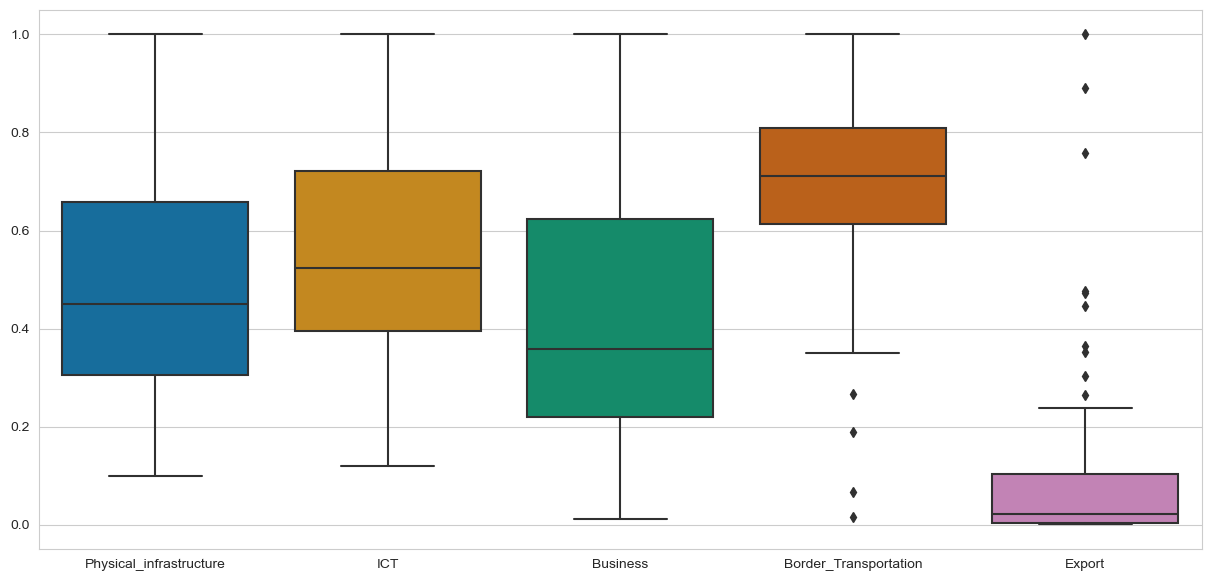

In [1580]:
plt.figure(figsize=(15,7))
sns.boxplot(data = trade[['Physical_infrastructure','ICT','Business','Border_Transportation','Export']])
plt.show()

In [1581]:
from scipy.stats.mstats import winsorize
winsorize(trade['Export'],(0.05,0.1),inplace=True)
winsorize(trade['Border_Transportation'],(0.04,0),inplace=True)


plt.show()

In [1582]:
trade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 0 to 111
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Physical_infrastructure  106 non-null    float64
 1   ICT                      106 non-null    float64
 2   Business                 106 non-null    float64
 3   Border_Transportation    106 non-null    float64
 4   Export                   106 non-null    float64
dtypes: float64(5)
memory usage: 5.0 KB


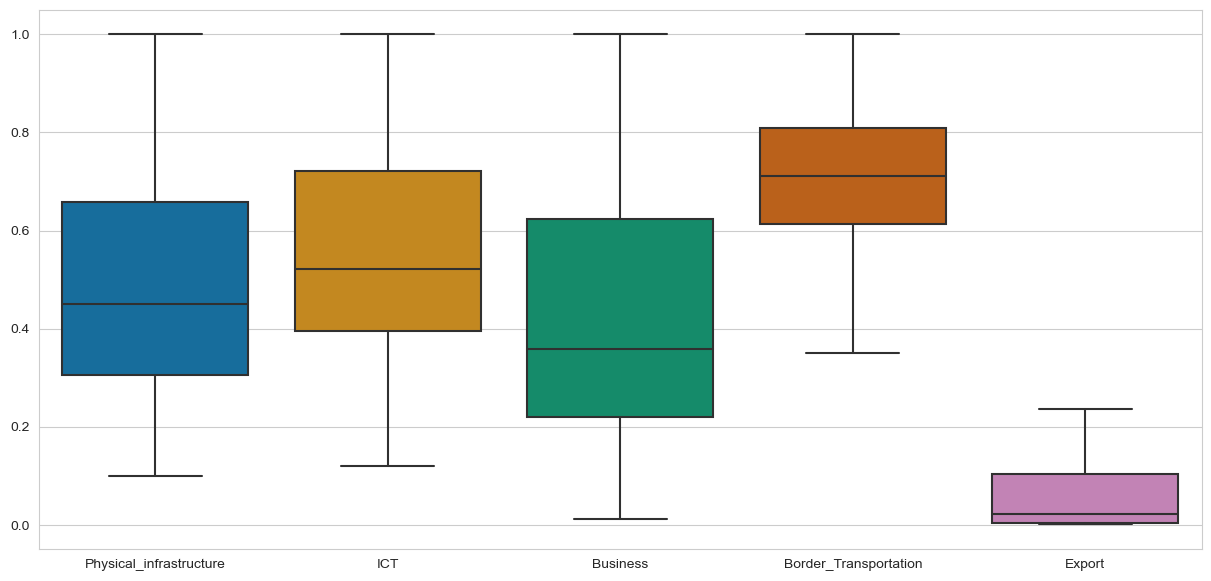

In [1583]:
plt.figure(figsize=(15,7))
sns.boxplot(data = trade[['Physical_infrastructure','ICT','Business','Border_Transportation','Export']])
plt.show()

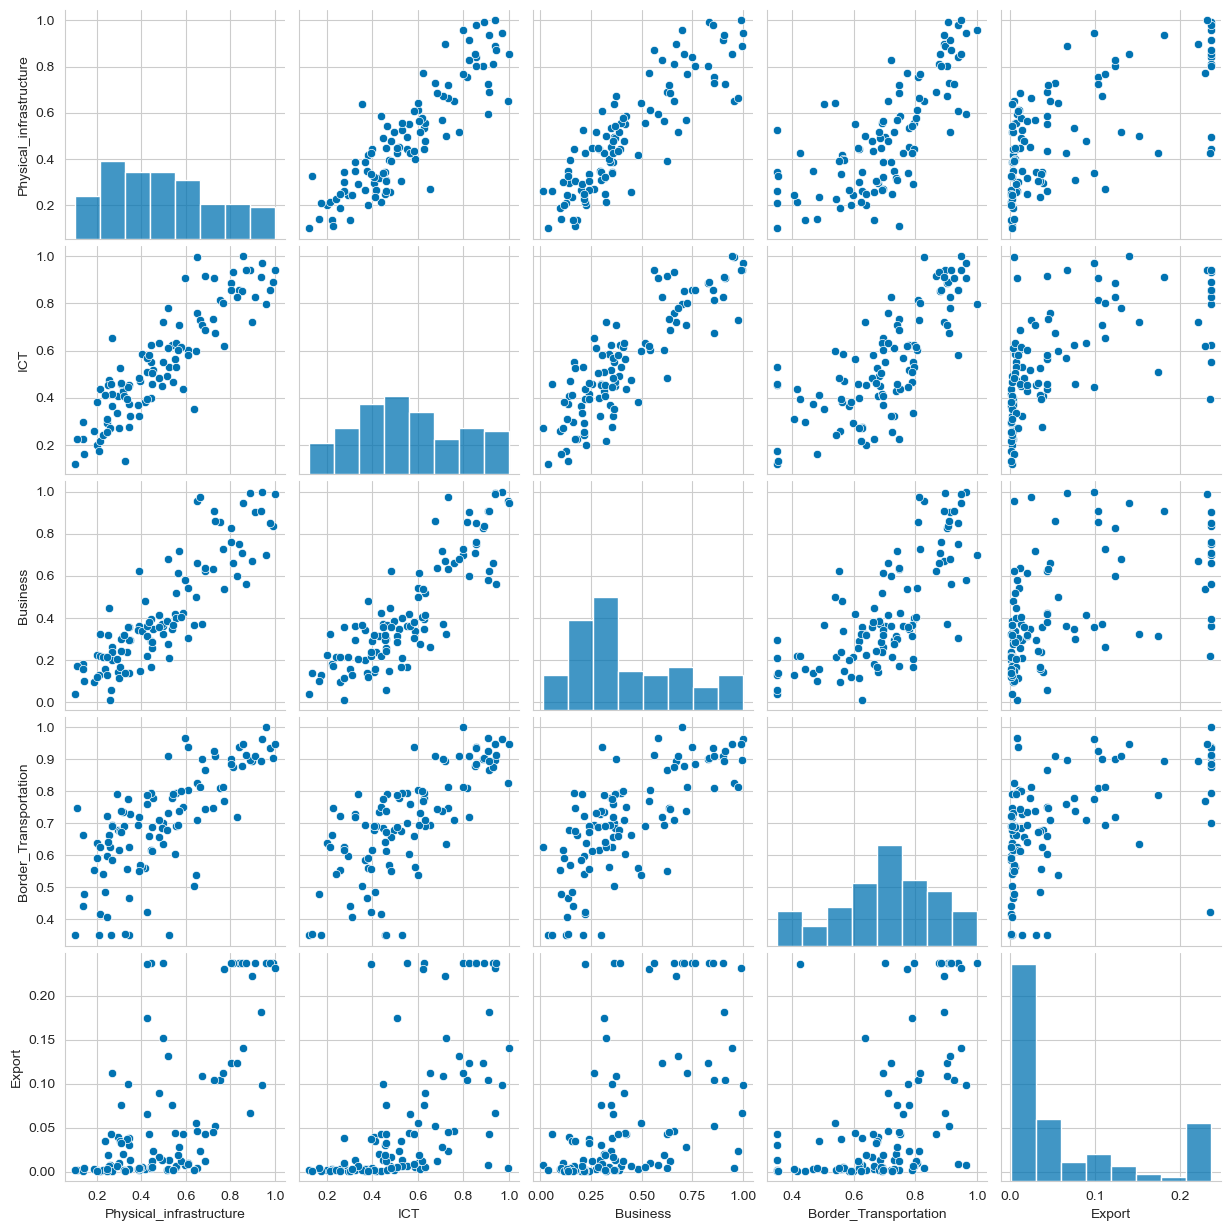

In [1584]:
sns.set_palette("colorblind")
sns.set_style('whitegrid')

# Pairplot plots all permutations possible and shows the pictures of relation amongst features
sns.pairplot(trade)

<Axes: >

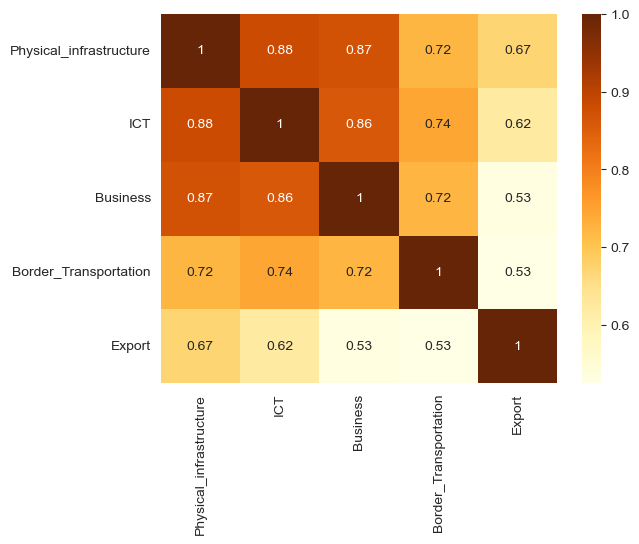

In [1585]:
correlation = trade.iloc[:, :].corr().round(3)
sns.heatmap(correlation,annot=True,cmap='YlOrBr')

In [1586]:
#Feature we consider are numerical features stored in "X" which hold meaning, all other columns are omitted

X =trade[['Physical_infrastructure','ICT','Business','Border_Transportation']]

#Target is stored in "Y"

Y = trade['Export']

#Using model_selection.train_test_split from sklearn to split the data into training and testing sets.

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)


In [1588]:

import statsmodels.api as sm

X_train1 = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train1).fit(cov_type='HC3')

#X_test1 = sm.add_constant(X_test)
X_test1 = sm.add_constant(X_train)
predictions = model.predict(X_test1) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 Export   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     21.09
Date:                Thu, 28 Sep 2023   Prob (F-statistic):           2.15e-11
Time:                        15:24:34   Log-Likelihood:                 121.61
No. Observations:                  74   AIC:                            -233.2
Df Residuals:                      69   BIC:                            -221.7
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [1589]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# the independent variables set
X = trade[['Physical_infrastructure','ICT','Business','Border_Transportation']]
X=sm.add_constant(X)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(len(X.columns))]

print(vif_data)

                   feature        VIF
0                    const  24.772243
1  Physical_infrastructure   5.843162
2                      ICT   5.754939
3                 Business   5.076769
4    Border_Transportation   2.422826


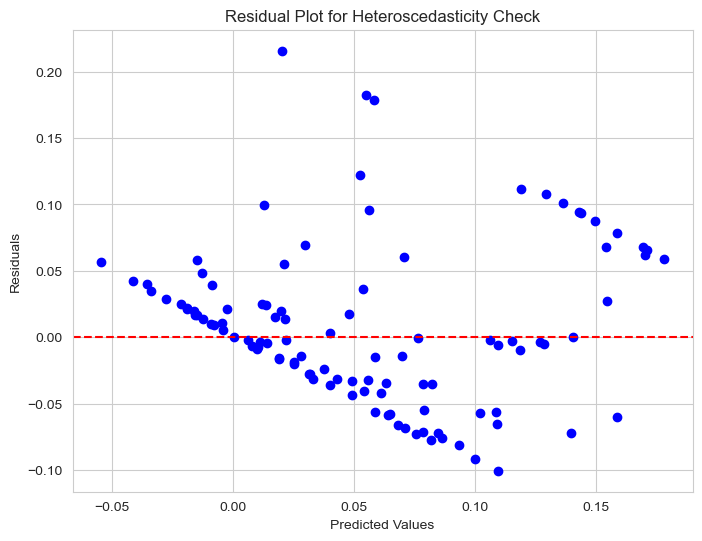

In [1590]:
Y_pred=-0.1106+ 0.2251*trade['Physical_infrastructure']+0.0125*trade['ICT']-0.0482*trade['Business']+0.0966*trade['Border_Transportation']
residuals = Y - Y_pred  # Replace Y_test and Y_pred with your actual variables

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_pred, residuals, label='Data Points', color='blue')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Heteroscedasticity Check')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()

In [1591]:
#Feature we consider are numerical features stored in "X" which hold meaning, all other columns are omitted

X =trade[['Physical_infrastructure','Business','Border_Transportation']]

#Target is stored in "Y"

Y = trade['Export']

#Using model_selection.train_test_split from sklearn to split the data into training and testing sets.

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)


import statsmodels.api as sm

X_train1 = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train1).fit()

X_test1 = sm.add_constant(X_test)
predictions = model.predict(X_test1) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 Export   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     36.72
Date:                Thu, 28 Sep 2023   Prob (F-statistic):           2.27e-14
Time:                        15:24:46   Log-Likelihood:                 121.59
No. Observations:                  74   AIC:                            -235.2
Df Residuals:                      70   BIC:                            -226.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

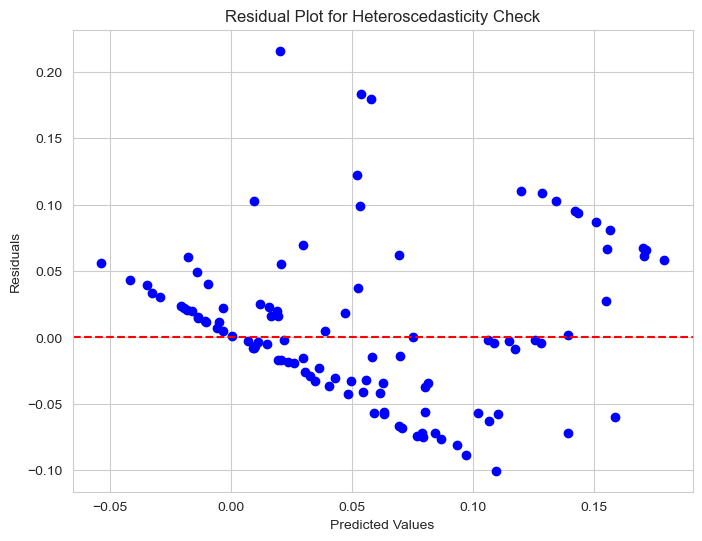

In [1592]:
Y_pred=-0.1098+ 0.2301*trade['Physical_infrastructure']-0.0437*trade['Business']+0.0986*trade['Border_Transportation']
residuals = Y - Y_pred  # Replace Y_test and Y_pred with your actual variables

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_pred, residuals, label='Data Points', color='blue')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Heteroscedasticity Check')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()

In [1607]:
#Feature we consider are numerical features stored in "X" which hold meaning, all other columns are omitted

X =trade[['Physical_infrastructure','Border_Transportation']]

#Target is stored in "Y"

Y = trade['Export']

#Using model_selection.train_test_split from sklearn to split the data into training and testing sets.

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)


import statsmodels.api as sm

X_train1 = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train1).fit()

X_test1 = sm.add_constant(X_test)
predictions = model.predict(X_test1) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 Export   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     54.61
Date:                Thu, 28 Sep 2023   Prob (F-statistic):           4.35e-15
Time:                        15:36:37   Log-Likelihood:                 121.08
No. Observations:                  74   AIC:                            -236.2
Df Residuals:                      71   BIC:                            -229.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [1594]:
import numpy as np
import plotly.graph_objs as go

# Sample data (replace with your actual data)
X1 = trade['Physical_infrastructure']
X2 = trade['Border_Transportation']
Y = trade['Export']

# Ensure that you have the correct coefficients from your linear regression model
beta02 =   -0.1046
beta12 =   0.1920  
beta22 =   0.0913

# Create a meshgrid covering the actual data range for X1 and X2
x_grid, y_grid = np.meshgrid(np.linspace(X1.min(), X1.max(), 10), np.linspace(X2.min(), X2.max(), 10))

# Calculate the predicted values for the plane using the correct coefficients
z_plane = beta02 + beta12 * x_grid + beta22 * y_grid

# Create a scatter plot for the actual data points
scatter_actual = go.Scatter3d(
    x=X1,
    y=X2,
    z=Y,
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Actual Data'
)

# Create a surface plot for the predicted linear plane
surface_predicted = go.Surface(
    x=x_grid,
    y=y_grid,
    z=z_plane,
    colorscale='Viridis',
    opacity=0.6,
    name='Predicted Plane'
)

# Define the layout for the 3D plot, including axis labels
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Physical Infrastructure'),
        yaxis=dict(title='Border Transportation'),
        zaxis=dict(title='Export')
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Create the figure
fig = go.Figure(data=[scatter_actual, surface_predicted], layout=layout)

# Show the 3D plot
fig.show()

In [1595]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# the independent variables set
X = trade[['Physical_infrastructure','Business','Border_Transportation']]
X=sm.add_constant(X)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
    for i in range(len(X.columns))]

print(vif_data)


                   feature        VIF
0                    const  24.569950
1  Physical_infrastructure   4.464234
2                 Business   4.490105
3    Border_Transportation   2.276064


In [1596]:
# Importing libraries
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

X

# Conduct the Breusch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value']

# Get the test result
test_result = sms.het_breuschpagan(model.resid, model.model.exog)

lzip(names, test_result)


[('Lagrange multiplier statistic', 15.731378347109755),
 ('p-value', 0.001287224899568956),
 ('f-value', 6.29953968968969),
 ('f p-value', 0.0007600122935333852)]

In [1597]:
trade.head(10)

,Physical_infrastructure,ICT,Business,Border_Transportation,Export
0,0.199268,0.202198,0.224723,0.639566,0.001678
1,0.343228,0.274871,0.355446,0.627198,0.038138
2,0.295575,0.407860,0.141944,0.678222,0.039121
3,0.246160,0.291690,0.213323,0.598222,0.001070
4,0.754772,0.814906,0.856358,0.809220,0.104092
5,0.803543,0.884016,0.826154,0.901347,0.123372
6,0.523763,0.532115,0.209067,0.350247,0.013427
7,0.611164,0.601917,0.540422,0.804987,0.010293
8,0.259590,0.274058,0.012305,0.627472,0.008013
9,0.895846,0.720226,0.669833,0.894282,0.222181


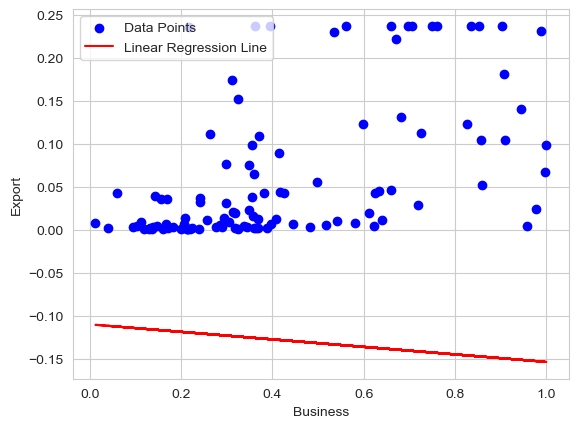

In [1604]:
import numpy as np
import matplotlib.pyplot as plt

m='Business'
n='Export'
# Data points
X = trade[m]  # Replace with your actual data
Y = trade[n]  # Replace with your actual data

# Linear regression coefficients
beta0 =  -0.1098 # Replace with your actual beta0
beta1 =  -0.0437
 # Replace with your actual beta1

# Calculate the predicted values using the linear regression equation
predicted_Y = beta0 + beta1 * X

# Create a scatter plot of the data points
plt.scatter(X, Y, label='Data Points', color='blue')

# Plot the linear regression line
plt.plot(X, predicted_Y, label='Linear Regression Line', color='red')

# Labeling and legends
plt.xlabel(m)
plt.ylabel(n)
plt.legend()

# Show the plot
plt.show()

In [1605]:
#Feature we consider are numerical features stored in "X" which hold meaning, all other columns are omitted

X =trade[['Business']]

#Target is stored in "Y"

Y = trade['Export']

#Using model_selection.train_test_split from sklearn to split the data into training and testing sets.

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)


import statsmodels.api as sm

X_train1 = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train1).fit()

X_test1 = sm.add_constant(X_test)
predictions = model.predict(X_test1) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 Export   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     52.13
Date:                Thu, 28 Sep 2023   Prob (F-statistic):           4.33e-10
Time:                        15:33:38   Log-Likelihood:                 106.77
No. Observations:                  74   AIC:                            -209.5
Df Residuals:                      72   BIC:                            -204.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0236      0.013     -1.848      0.0